# [Insert Research Title Here]

## CSCI.5573 Foundations of Data Science

### Group Gold

*   Harmin Azeemuddin
*   Freida Brazier
*   Nigmet Kizilkaya
*   Misha Laleh
*   Charity Miller
*   Yaritza Valverde






## Objective
Coronavirus is a global pandemic that is affecting the country at a rapid rate. Currently there are over 2 million confirmed cases and the numbers are steadily rising resulting in a massive amount of deaths with 1/3rd of them being in the United States. Our team will utilize live COVID-19 data that includes a continuous count of confirmed cases, recovered patients, and deaths due to the Coronavirus. 

## Importing our Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from scipy.integrate import odeint

## Preprocessing our Data for Analysis
Here we will clean and mold our data for analysis.  We are telling Pandas to Display our Data Weekly Rather Than Daily

In [2]:
cols = ['WK 1: 02/01 - 02/07','WK 2: 02/08 - 02/14', 'WK 3: 02/15 - 02/21', 'WK 4: 02/22 - 02/28', 'WK 5: 02/29 - 03/06', 'WK 6: 03/07 - 03/13', 'WK 7: 03/14 - 03/20', 'WK 8: 03/21 - 03/27', 'WK 9: 03/28 - 04/03', 'WK 10: 04/04 - 04/10', 'WK 11: 04/11 - 04/17']

## Reading the Global Death Data into our Notebook from the Github Repository using the following URL

In [3]:
Deaths_0=pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

## Displaying the Data Info for the COVID 19 Death Data

In [4]:
print('Death dataset shape:\n ', Deaths_0.shape)
print('\nDeath dataset types:\n ', Deaths_0.dtypes)
print('\nDeath dataset column names:\n ', Deaths_0.columns)
print('\nDeath dataset description:\n ', Deaths_0.describe)

Death dataset shape:
  (264, 95)

Death dataset types:
  Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/17/20             int64
4/18/20             int64
4/19/20             int64
4/20/20             int64
4/21/20             int64
Length: 95, dtype: object

Death dataset column names:
  Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/

## Displaying the First 5 Rows of the Death Data by Date

In [5]:
#View our dataset
Deaths_0.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18,21,23,25,30,30,30,33,36,36
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,23,24,25,26,26,26,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,293,313,326,336,348,364,367,375,384,392
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,29,29,31,33,33,35,35,36,37,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


## Dropping the Province/State Column from our Data

Looking at our missing data we can see that Province/State has null values in the majority of the rows in the dataset, so will proceed to drop this column.


In [6]:
Confirmed_0.isnull().sum()
Recovered_0.isnull().sum()
Deaths_0.isnull().sum()

NameError: name 'Confirmed_0' is not defined

In [7]:
Deaths_0.drop('Province/State', axis= 1, inplace = True)

## Displaying Columns by Week Rather than by Day

#### Preprocessing our Data to merge the Columns Displayed by Date into Columns Displayed by Week and Displaying the First 5 Rows

To create a simplified data frame we will consolidate individual day columns into weeks. This step will help to easily understand and visualize the data analysis.

**Note:** All column dates will be in the format of MM/DD. All column dates are in the year 2020.


In [8]:
Deaths_0['WK 1: 02/01 - 02/07'] = Deaths_0['2/7/20']
Deaths_0['WK 2: 02/08 - 02/14'] = Deaths_0['2/14/20']
Deaths_0['WK 3: 02/15 - 02/21'] = Deaths_0['2/21/20']
Deaths_0['WK 4: 02/22 - 02/28'] = Deaths_0['2/28/20']
Deaths_0['WK 5: 02/29 - 03/06'] = Deaths_0['3/6/20']
Deaths_0['WK 6: 03/07 - 03/13'] = Deaths_0['3/13/20']
Deaths_0['WK 7: 03/14 - 03/20'] = Deaths_0['3/20/20']
Deaths_0['WK 8: 03/21 - 03/27'] = Deaths_0['3/27/20']
Deaths_0['WK 9: 03/28 - 04/03'] = Deaths_0['4/3/20']
Deaths_0['WK 10: 04/04 - 04/10'] = Deaths_0['4/10/20']
Deaths_0['WK 11: 04/11 - 04/17'] = Deaths_0['4/17/20']

#After creating our weeks we will drop the individual day columns

Deaths_0.drop(['1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20'], axis=1, inplace=True)

Deaths_0.head()

,Country/Region,Lat,Long,4/18/20,4/19/20,4/20/20,4/21/20,WK 1: 02/01 - 02/07,WK 2: 02/08 - 02/14,WK 3: 02/15 - 02/21,WK 4: 02/22 - 02/28,WK 5: 02/29 - 03/06,WK 6: 03/07 - 03/13,WK 7: 03/14 - 03/20,WK 8: 03/21 - 03/27,WK 9: 03/28 - 04/03,WK 10: 04/04 - 04/10,WK 11: 04/11 - 04/17
0,Afghanistan,33.0000,65.0000,30,33,36,36,0,0,0,0,0,0,0,4,6,15,30
1,Albania,41.1533,20.1683,26,26,26,26,0,0,0,0,0,1,2,8,17,23,26
2,Algeria,28.0339,1.6596,367,375,384,392,0,0,0,0,0,2,11,26,105,256,364
3,Andorra,42.5063,1.5218,35,36,37,37,0,0,0,0,0,0,0,3,16,26,35
4,Angola,-11.2027,17.8739,2,2,2,2,0,0,0,0,0,0,0,0,2,2,2


In [9]:
#Copy Dataset
Deaths_1 = Deaths_0.copy()

## Merging the Country/ Region Column into One Single Column for Our Global Death Data

In [10]:
Duplicates = Deaths_1['Country/Region'].duplicated()
Deaths_1[Duplicates].sort_values('Country/Region')

,Country/Region,Lat,Long,4/18/20,4/19/20,4/20/20,4/21/20,WK 1: 02/01 - 02/07,WK 2: 02/08 - 02/14,WK 3: 02/15 - 02/21,WK 4: 02/22 - 02/28,WK 5: 02/29 - 03/06,WK 6: 03/07 - 03/13,WK 7: 03/14 - 03/20,WK 8: 03/21 - 03/27,WK 9: 03/28 - 04/03,WK 10: 04/04 - 04/10,WK 11: 04/11 - 04/17
9,Australia,-33.8688,151.2093,26,26,26,26,0,0,0,0,1,2,6,7,12,22,26
10,Australia,-12.4634,130.8456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,Australia,-28.0167,153.4000,6,6,6,6,0,0,0,0,0,0,0,1,4,4,5
12,Australia,-34.9285,138.6007,4,4,4,4,0,0,0,0,0,0,0,0,0,3,4
13,Australia,-41.4545,145.9707,7,7,7,7,0,0,0,0,0,0,0,0,2,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
250,United Kingdom,18.4207,-64.6400,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
251,United Kingdom,21.6940,-71.7979,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1
218,United Kingdom,19.3133,-81.2546,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1


## Displaying the First 5 Rows After Merging the Country/ Region Column

In [11]:
#rows are now summed by country/region
 
Deaths_2 = pd.DataFrame(Deaths_1.groupby(['Country/Region']).sum()[cols])
Deaths_2.head(5)

,WK 1: 02/01 - 02/07,WK 2: 02/08 - 02/14,WK 3: 02/15 - 02/21,WK 4: 02/22 - 02/28,WK 5: 02/29 - 03/06,WK 6: 03/07 - 03/13,WK 7: 03/14 - 03/20,WK 8: 03/21 - 03/27,WK 9: 03/28 - 04/03,WK 10: 04/04 - 04/10,WK 11: 04/11 - 04/17
Country/Region,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,4,6,15,30
Albania,0,0,0,0,0,1,2,8,17,23,26
Algeria,0,0,0,0,0,2,11,26,105,256,364
Andorra,0,0,0,0,0,0,0,3,16,26,35
Angola,0,0,0,0,0,0,0,0,2,2,2


## Merging Rows with the Same Country/ Region by Latitude and Longitude

In [12]:
#Dataset of country index and Latitude and Longitude
Deaths_3 = Deaths_1.copy()
Deaths_3.set_index('Country/Region', inplace = True)
Deaths_3.stack() #Grouping rows with the same Country/Region together
Deaths_3.head(10)

,Lat,Long,4/18/20,4/19/20,4/20/20,4/21/20,WK 1: 02/01 - 02/07,WK 2: 02/08 - 02/14,WK 3: 02/15 - 02/21,WK 4: 02/22 - 02/28,WK 5: 02/29 - 03/06,WK 6: 03/07 - 03/13,WK 7: 03/14 - 03/20,WK 8: 03/21 - 03/27,WK 9: 03/28 - 04/03,WK 10: 04/04 - 04/10,WK 11: 04/11 - 04/17
Country/Region,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,30,33,36,36,0,0,0,0,0,0,0,4,6,15,30
Albania,41.1533,20.1683,26,26,26,26,0,0,0,0,0,1,2,8,17,23,26
Algeria,28.0339,1.6596,367,375,384,392,0,0,0,0,0,2,11,26,105,256,364
Andorra,42.5063,1.5218,35,36,37,37,0,0,0,0,0,0,0,3,16,26,35
Angola,-11.2027,17.8739,2,2,2,2,0,0,0,0,0,0,0,0,2,2,2
Antigua and Barbuda,17.0608,-61.7964,3,3,3,3,0,0,0,0,0,0,0,0,0,2,3
Argentina,-38.4161,-63.6167,129,132,136,147,0,0,0,0,0,2,3,13,39,82,123
Armenia,40.0691,45.0382,20,20,22,24,0,0,0,0,0,0,0,1,7,12,19
Australia,-35.4735,149.0124,3,3,3,3,0,0,0,0,0,0,0,0,1,2,3


##  The International Death Toll per Week

In [13]:
Deaths_sum =  Deaths_2.sum(axis=0)

print('Total number of deaths each week internationally:\n \n', Deaths_sum)

Total number of deaths each week internationally:
 
 WK 1: 02/01 - 02/07        719
WK 2: 02/08 - 02/14       1523
WK 3: 02/15 - 02/21       2251
WK 4: 02/22 - 02/28       2872
WK 5: 02/29 - 03/06       3460
WK 6: 03/07 - 03/13       5404
WK 7: 03/14 - 03/20      11299
WK 8: 03/21 - 03/27      27198
WK 9: 03/28 - 04/03      58787
WK 10: 04/04 - 04/10    102525
WK 11: 04/11 - 04/17    153821
dtype: int64


## Plot Displaying a Weekly Running Total of Global Deaths

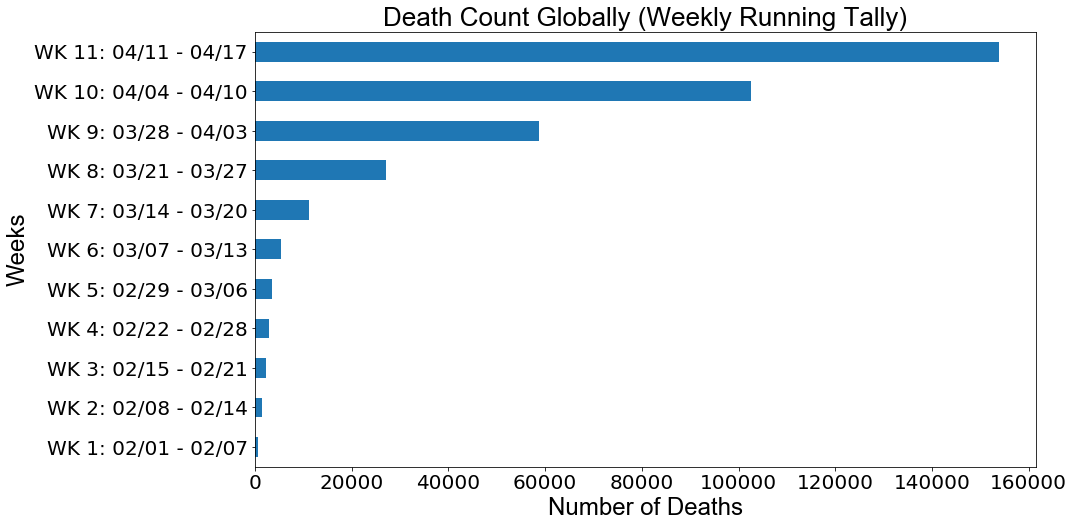

In [14]:
Deaths_plt = Deaths_sum.plot(kind='barh', figsize=(14, 8))
Deaths_plt.set_ylabel("Weeks", fontname="Arial", fontsize=24)
Deaths_plt.set_xlabel("Number of Deaths", fontname="Arial", fontsize=24)
Deaths_plt.set_title("Death Count Globally (Weekly Running Tally)", fontname='Arial', fontsize=26)

for item in (Deaths_plt.get_xticklabels() + Deaths_plt.get_yticklabels()):
    item.set_fontsize(20)
 

## Reading the Global Recovered Data into our Notebook from the Github Repository using the following URL

In [15]:
Recovered_0=pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

## Displaying the Data Info for the COVID 19 Recovered Data

In [16]:
print('Recovered dataset shape:\n ', Recovered_0.shape)
print('\nRecovered dataset types:\n ', Recovered_0.dtypes)
print('\nRecovered dataset column names:\n ', Recovered_0.columns)
print('\nRecovered dataset description:\n ', Recovered_0.describe())

Recovered dataset shape:
  (250, 95)

Recovered dataset types:
  Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/17/20             int64
4/18/20             int64
4/19/20             int64
4/20/20             int64
4/21/20             int64
Length: 95, dtype: object

Recovered dataset column names:
  Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '

## Displaying the First 5 Rows of People Who Have Recovered by Date

In [17]:
#View our dataset
Recovered_0.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,32,32,40,43,54,99,112,131,135,150
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,217,232,248,251,277,283,302,314,327,345
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,591,601,691,708,783,846,894,1047,1099,1152
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,128,128,128,169,169,191,205,235,248,282
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,5,5,5,5,6,6,6,6


## Displaying info for the Recovered Column

In [18]:
Recovered_0.isnull().sum()

Province/State    183
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/17/20             0
4/18/20             0
4/19/20             0
4/20/20             0
4/21/20             0
Length: 95, dtype: int64

## Dropping the Province/ State Column from the Recovered Data

In [19]:
Recovered_0.drop('Province/State', axis= 1, inplace = True)

In [20]:
Recovered_0['WK 1: 02/01 - 02/07'] = Recovered_0['2/7/20']
Recovered_0['WK 2: 02/08 - 02/14'] = Recovered_0['2/14/20']
Recovered_0['WK 3: 02/15 - 02/21'] = Recovered_0['2/21/20']
Recovered_0['WK 4: 02/22 - 02/28'] = Recovered_0['2/28/20']
Recovered_0['WK 5: 02/29 - 03/06'] = Recovered_0['3/6/20']
Recovered_0['WK 6: 03/07 - 03/13'] = Recovered_0['3/13/20']
Recovered_0['WK 7: 03/14 - 03/20'] = Recovered_0['3/20/20']
Recovered_0['WK 8: 03/21 - 03/27'] = Recovered_0['3/27/20']
Recovered_0['WK 9: 03/28 - 04/03'] = Recovered_0['4/3/20']
Recovered_0['WK 10: 04/04 - 04/10'] = Recovered_0['4/10/20']
Recovered_0['WK 11: 04/11 - 04/17'] = Recovered_0['4/17/20']

#Drop day columns

Recovered_0.drop(['1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20'], axis=1, inplace=True)

Recovered_0.head()

,Country/Region,Lat,Long,4/18/20,4/19/20,4/20/20,4/21/20,WK 1: 02/01 - 02/07,WK 2: 02/08 - 02/14,WK 3: 02/15 - 02/21,WK 4: 02/22 - 02/28,WK 5: 02/29 - 03/06,WK 6: 03/07 - 03/13,WK 7: 03/14 - 03/20,WK 8: 03/21 - 03/27,WK 9: 03/28 - 04/03,WK 10: 04/04 - 04/10,WK 11: 04/11 - 04/17
0,Afghanistan,33.0000,65.0000,112,131,135,150,0,0,0,0,0,0,1,2,10,32,99
1,Albania,41.1533,20.1683,302,314,327,345,0,0,0,0,0,0,0,31,89,182,283
2,Algeria,28.0339,1.6596,894,1047,1099,1152,0,0,0,0,0,8,32,29,62,405,846
3,Andorra,42.5063,1.5218,205,235,248,282,0,0,0,0,0,0,1,1,16,71,191
4,Angola,-11.2027,17.8739,6,6,6,6,0,0,0,0,0,0,0,0,1,2,5


In [21]:
#Copy Dataset
Recovered_1 = Recovered_0.copy()

## Merging the Country/ Region Column into One Single Column for the Recovered Data

In [22]:
Duplicates = Recovered_1['Country/Region'].duplicated()
Recovered_1[Duplicates].sort_values('Country/Region')

,Country/Region,Lat,Long,4/18/20,4/19/20,4/20/20,4/21/20,WK 1: 02/01 - 02/07,WK 2: 02/08 - 02/14,WK 3: 02/15 - 02/21,WK 4: 02/22 - 02/28,WK 5: 02/29 - 03/06,WK 6: 03/07 - 03/13,WK 7: 03/14 - 03/20,WK 8: 03/21 - 03/27,WK 9: 03/28 - 04/03,WK 10: 04/04 - 04/10,WK 11: 04/11 - 04/17
9,Australia,-33.8688,151.2093,1379,1379,1379,1379,2,4,4,4,4,4,4,4,4,4,1379
10,Australia,-12.4634,130.8456,9,9,9,9,0,0,0,0,0,0,0,0,0,2,9
11,Australia,-28.0167,153.4000,738,738,738,738,0,0,1,1,8,8,8,8,8,372,442
12,Australia,-34.9285,138.6007,331,331,331,331,0,0,2,2,2,3,3,6,46,179,331
13,Australia,-41.4545,145.9707,67,67,67,67,0,0,0,0,0,0,3,3,5,48,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,United Kingdom,55.3781,-3.4360,0,0,0,0,0,1,8,8,8,18,65,135,135,344,0
235,United Kingdom,18.2206,-63.0686,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1
236,United Kingdom,18.4207,-64.6400,2,2,3,3,0,0,0,0,0,0,0,0,0,0,2
237,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Displaying the First 5 Rows after Merging the Country/Region Column

In [23]:
#rows are now summed by country/region
Recovered_2 = pd.DataFrame(Recovered_1.groupby(['Country/Region']).sum()[cols])
Recovered_2.head(5)

,WK 1: 02/01 - 02/07,WK 2: 02/08 - 02/14,WK 3: 02/15 - 02/21,WK 4: 02/22 - 02/28,WK 5: 02/29 - 03/06,WK 6: 03/07 - 03/13,WK 7: 03/14 - 03/20,WK 8: 03/21 - 03/27,WK 9: 03/28 - 04/03,WK 10: 04/04 - 04/10,WK 11: 04/11 - 04/17
Country/Region,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,1,2,10,32,99
Albania,0,0,0,0,0,0,0,31,89,182,283
Algeria,0,0,0,0,0,8,32,29,62,405,846
Andorra,0,0,0,0,0,0,1,1,16,71,191
Angola,0,0,0,0,0,0,0,0,1,2,5


## Merging Rows with the Same Country/ Region by Latitude and Longitude

In [24]:
#Dataset of country index and Latitude and Longitude
Recovered_3 = Recovered_1.copy()
Recovered_3.set_index('Country/Region', inplace = True)
Recovered_3.stack() #Grouping rows with the same Country/Region together
Recovered_3.head(15)

,Lat,Long,4/18/20,4/19/20,4/20/20,4/21/20,WK 1: 02/01 - 02/07,WK 2: 02/08 - 02/14,WK 3: 02/15 - 02/21,WK 4: 02/22 - 02/28,WK 5: 02/29 - 03/06,WK 6: 03/07 - 03/13,WK 7: 03/14 - 03/20,WK 8: 03/21 - 03/27,WK 9: 03/28 - 04/03,WK 10: 04/04 - 04/10,WK 11: 04/11 - 04/17
Country/Region,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,112,131,135,150,0,0,0,0,0,0,1,2,10,32,99
Albania,41.1533,20.1683,302,314,327,345,0,0,0,0,0,0,0,31,89,182,283
Algeria,28.0339,1.6596,894,1047,1099,1152,0,0,0,0,0,8,32,29,62,405,846
Andorra,42.5063,1.5218,205,235,248,282,0,0,0,0,0,0,1,1,16,71,191
Angola,-11.2027,17.8739,6,6,6,6,0,0,0,0,0,0,0,0,1,2,5
Antigua and Barbuda,17.0608,-61.7964,3,3,3,7,0,0,0,0,0,0,0,0,0,0,3
Argentina,-38.4161,-63.6167,685,709,737,840,0,0,0,0,0,0,3,72,266,375,666
Armenia,40.0691,45.0382,523,545,580,609,0,0,0,0,0,0,1,28,43,149,402
Australia,-35.4735,149.0124,88,88,88,88,0,0,0,0,0,0,0,1,18,59,81


## Total Number of International Recoveries Each Week

In [25]:
Recovered_sum =  Recovered_2.sum(axis=0)

print('Total number of Recoveries each week internationally:\n \n', Recovered_sum)

Total number of Recoveries each week internationally:
 
 WK 1: 02/01 - 02/07       2011
WK 2: 02/08 - 02/14       8058
WK 3: 02/15 - 02/21      18890
WK 4: 02/22 - 02/28      36711
WK 5: 02/29 - 03/06      55865
WK 6: 03/07 - 03/13      70251
WK 7: 03/14 - 03/20      87420
WK 8: 03/21 - 03/27     130915
WK 9: 03/28 - 04/03     225796
WK 10: 04/04 - 04/10    376096
WK 11: 04/11 - 04/17    568343
dtype: int64


## Plot Displaying a Weekly Running Total of Global Recoveries

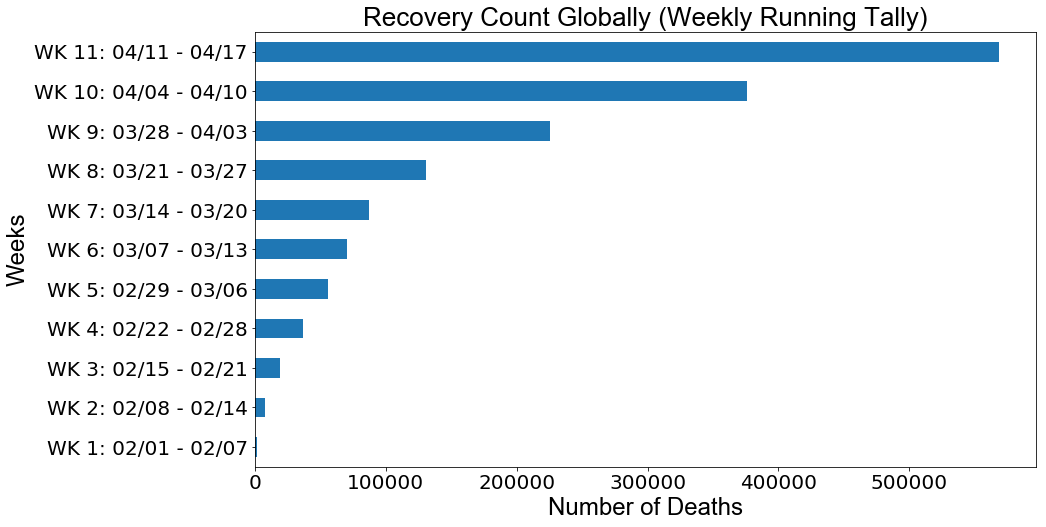

In [26]:
Recovered_plt = Recovered_sum.plot(kind='barh', figsize=(14,8))
Recovered_plt.set_ylabel("Weeks", fontname="Arial", fontsize=24)
Recovered_plt.set_xlabel("Number of Deaths", fontname="Arial", fontsize=24)
Recovered_plt.set_title("Recovery Count Globally (Weekly Running Tally)", fontname='Arial', fontsize=26)

for item in (Recovered_plt.get_xticklabels() + Recovered_plt.get_yticklabels()):
    item.set_fontsize(20)


## Reading our Global Confirmed Data into our Notebook from the Github Repository using the following URL

In [27]:
Confirmed_0 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

## Displaying the Data Info for the COVID 19 Confirmed Data

In [28]:
print('Confirmed dataset shape:\n ', Confirmed_0.shape)
print('\nConfirmed dataset types:\n ', Confirmed_0.dtypes)
print('\nConfirmed dataset column names:\n ', Confirmed_0.columns)
print('\nConfirmed dataset description:\n ', Confirmed_0.describe())

Confirmed dataset shape:
  (264, 95)

Confirmed dataset types:
  Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/17/20             int64
4/18/20             int64
4/19/20             int64
4/20/20             int64
4/21/20             int64
Length: 95, dtype: object

Confirmed dataset column names:
  Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '

## Displaying the First 5 Rows of the Confirmed Data by Day

In [29]:
#View our dataset
Confirmed_0.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,607,665,714,784,840,906,933,996,1026,1092
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,446,467,475,494,518,539,548,562,584,609
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,638,646,659,673,673,696,704,713,717,717
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,24,24,24,24


In [30]:
Confirmed_0.drop('Province/State', axis= 1, inplace = True)

In [31]:
Confirmed_0['WK 1: 02/01 - 02/07'] = Confirmed_0['2/7/20']
Confirmed_0['WK 2: 02/08 - 02/14'] = Confirmed_0['2/14/20']
Confirmed_0['WK 3: 02/15 - 02/21'] = Confirmed_0['2/21/20']
Confirmed_0['WK 4: 02/22 - 02/28'] = Confirmed_0['2/28/20']
Confirmed_0['WK 5: 02/29 - 03/06'] = Confirmed_0['3/6/20']
Confirmed_0['WK 6: 03/07 - 03/13'] = Confirmed_0['3/13/20']
Confirmed_0['WK 7: 03/14 - 03/20'] = Confirmed_0['3/20/20']
Confirmed_0['WK 8: 03/21 - 03/27'] = Confirmed_0['3/27/20']
Confirmed_0['WK 9: 03/28 - 04/03'] = Confirmed_0['4/3/20']
Confirmed_0['WK 10: 04/04 - 04/10'] = Confirmed_0['4/10/20']
Confirmed_0['WK 11: 04/11 - 04/17'] = Confirmed_0['4/17/20']

#Drop day columns

Confirmed_0.drop(['1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20'], axis=1, inplace=True)

Confirmed_0.head()

,Country/Region,Lat,Long,4/18/20,4/19/20,4/20/20,4/21/20,WK 1: 02/01 - 02/07,WK 2: 02/08 - 02/14,WK 3: 02/15 - 02/21,WK 4: 02/22 - 02/28,WK 5: 02/29 - 03/06,WK 6: 03/07 - 03/13,WK 7: 03/14 - 03/20,WK 8: 03/21 - 03/27,WK 9: 03/28 - 04/03,WK 10: 04/04 - 04/10,WK 11: 04/11 - 04/17
0,Afghanistan,33.0000,65.0000,933,996,1026,1092,0,0,0,1,1,7,24,110,281,521,906
1,Albania,41.1533,20.1683,548,562,584,609,0,0,0,0,0,33,70,186,304,416,539
2,Algeria,28.0339,1.6596,2534,2629,2718,2811,0,0,0,1,17,26,90,409,1171,1761,2418
3,Andorra,42.5063,1.5218,704,713,717,717,0,0,0,0,1,1,75,267,439,601,696
4,Angola,-11.2027,17.8739,24,24,24,24,0,0,0,0,0,0,1,4,8,19,19


In [32]:
#Copy Dataset
Confirmed_1 = Confirmed_0.copy()

## Merging the Country/ Region Column into One Single Column for the Global Confirmed Data

In [34]:
Duplicates = Confirmed_1['Country/Region'].duplicated()
Confirmed_1[Duplicates].sort_values('Country/Region')

,Country/Region,Lat,Long,4/18/20,4/19/20,4/20/20,4/21/20,WK 1: 02/01 - 02/07,WK 2: 02/08 - 02/14,WK 3: 02/15 - 02/21,WK 4: 02/22 - 02/28,WK 5: 02/29 - 03/06,WK 6: 03/07 - 03/13,WK 7: 03/14 - 03/20,WK 8: 03/21 - 03/27,WK 9: 03/28 - 04/03,WK 10: 04/04 - 04/10,WK 11: 04/11 - 04/17
9,Australia,-33.8688,151.2093,2926,2926,2926,2926,4,4,4,4,26,92,353,1405,2389,2822,2926
10,Australia,-12.4634,130.8456,28,28,28,28,0,0,0,0,0,1,3,12,22,28,28
11,Australia,-28.0167,153.4000,1015,1015,1015,1015,5,5,5,5,13,35,184,555,873,965,1007
12,Australia,-34.9285,138.6007,435,435,435,435,2,2,2,2,7,16,50,257,396,428,435
13,Australia,-41.4545,145.9707,180,180,180,180,0,0,0,0,1,5,10,47,74,122,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,United Kingdom,18.2206,-63.0686,3,3,3,3,0,0,0,0,0,0,0,0,3,3,3
250,United Kingdom,18.4207,-64.6400,4,4,5,5,0,0,0,0,0,0,0,0,3,3,4
251,United Kingdom,21.6940,-71.7979,11,11,11,11,0,0,0,0,0,0,0,0,5,8,11
218,United Kingdom,19.3133,-81.2546,61,61,66,66,0,0,0,0,0,1,3,8,28,45,61


## Displaying the First 5 Rows of Global Confirmed COVID 19 Data by Week

In [35]:
#rows are now summed by country/region
Confirmed_2 = pd.DataFrame(Confirmed_1.groupby(['Country/Region']).sum()[cols])
Confirmed_2.head(5)

,WK 1: 02/01 - 02/07,WK 2: 02/08 - 02/14,WK 3: 02/15 - 02/21,WK 4: 02/22 - 02/28,WK 5: 02/29 - 03/06,WK 6: 03/07 - 03/13,WK 7: 03/14 - 03/20,WK 8: 03/21 - 03/27,WK 9: 03/28 - 04/03,WK 10: 04/04 - 04/10,WK 11: 04/11 - 04/17
Country/Region,,,,,,,,,,,
Afghanistan,0,0,0,1,1,7,24,110,281,521,906
Albania,0,0,0,0,0,33,70,186,304,416,539
Algeria,0,0,0,1,17,26,90,409,1171,1761,2418
Andorra,0,0,0,0,1,1,75,267,439,601,696
Angola,0,0,0,0,0,0,1,4,8,19,19


## Merging Rows with the Same Country/ Region by Latitude and Longitude

In [36]:
#Dataset of country index and Latitude and Longitude
Confirmed_3 = Confirmed_1.copy()
Confirmed_3.set_index('Country/Region', inplace = True)
Confirmed_3.stack() #Grouping rows with the same Country/Region together
Confirmed_3.head(10)

,Lat,Long,4/18/20,4/19/20,4/20/20,4/21/20,WK 1: 02/01 - 02/07,WK 2: 02/08 - 02/14,WK 3: 02/15 - 02/21,WK 4: 02/22 - 02/28,WK 5: 02/29 - 03/06,WK 6: 03/07 - 03/13,WK 7: 03/14 - 03/20,WK 8: 03/21 - 03/27,WK 9: 03/28 - 04/03,WK 10: 04/04 - 04/10,WK 11: 04/11 - 04/17
Country/Region,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,933,996,1026,1092,0,0,0,1,1,7,24,110,281,521,906
Albania,41.1533,20.1683,548,562,584,609,0,0,0,0,0,33,70,186,304,416,539
Algeria,28.0339,1.6596,2534,2629,2718,2811,0,0,0,1,17,26,90,409,1171,1761,2418
Andorra,42.5063,1.5218,704,713,717,717,0,0,0,0,1,1,75,267,439,601,696
Angola,-11.2027,17.8739,24,24,24,24,0,0,0,0,0,0,1,4,8,19,19
Antigua and Barbuda,17.0608,-61.7964,23,23,23,23,0,0,0,0,0,1,1,7,15,19,23
Argentina,-38.4161,-63.6167,2758,2839,2941,3031,0,0,0,0,2,31,128,589,1265,1975,2669
Armenia,40.0691,45.0382,1248,1291,1339,1401,0,0,0,0,1,8,136,329,736,937,1201
Australia,-35.4735,149.0124,103,103,103,103,0,0,0,0,0,1,6,62,91,103,103


## Total Number of International Confirmed Cases Each Week

In [37]:
Confirmed_sum =  Confirmed_2.sum(axis=0)

print('Total number of Confirmed Cases each week internationally:\n \n', Confirmed_sum)

Total number of Confirmed Cases each week internationally:
 
 WK 1: 02/01 - 02/07       34391
WK 2: 02/08 - 02/14       66885
WK 3: 02/15 - 02/21       76819
WK 4: 02/22 - 02/28       84112
WK 5: 02/29 - 03/06      101801
WK 6: 03/07 - 03/13      145205
WK 7: 03/14 - 03/20      272208
WK 8: 03/21 - 03/27      593291
WK 9: 03/28 - 04/03     1095917
WK 10: 04/04 - 04/10    1657526
WK 11: 04/11 - 04/17    2240190
dtype: int64


## Plot Displaying a Weekly Running Total of Global Confirmed Cases

In [1]:
Confirmed_plt = Confirmed_sum.plot(kind='barh', figsize=(14, 8))
Confirmed_plt.set_ylabel("Weeks", fontname="Arial", fontsize=24)
Confirmed_plt.set_xlabel("Number of Deaths", fontname="Arial", fontsize=24)
Confirmed_plt.set_title("Confirmed Case Count Globally (Weekly Running Tally)", fontname='Arial', fontsize=26)

for item in (Confirmed_plt.get_xticklabels() + Confirmed_plt.get_yticklabels()):
    item.set_fontsize(20)


NameError: name 'Confirmed_sum' is not defined

# What were the **Mortality Rates** in each country?

Here we will calculate the fatality rate of COVID-19 per country.



### Creating a Dataframe with total Deaths, Recoveries, and Confirmed Cases as of 4/17/2020

In [39]:
Confirmed = pd.DataFrame(Confirmed_2['WK 11: 04/11 - 04/17'])
Recovered = pd.DataFrame(Recovered_2['WK 11: 04/11 - 04/17'])
Deaths = pd.DataFrame(Deaths_2['WK 11: 04/11 - 04/17'])

In [40]:
covid_concat1 = Confirmed.join(Recovered, lsuffix='Confirmed', rsuffix='Recovered')
covid_concat2 = covid_concat1.join(Deaths, lsuffix='covid_concat1', rsuffix='Deaths')
covid_concat2.head()
covid_outcomes = pd.DataFrame(covid_concat2)
covid_columns = ['Confirmed', 'Recovered', 'Deaths']
covid_outcomes.columns = covid_columns
print('Total COVID-19 case count dataset sorted by \n Confirmed, Recovered, and Deaths')
covid_outcomes.head()

Total COVID-19 case count dataset sorted by 
 Confirmed, Recovered, and Deaths


,Confirmed,Recovered,Deaths
Country/Region,,,
Afghanistan,906,99,30
Albania,539,283,26
Algeria,2418,846,364
Andorra,696,191,35
Angola,19,5,2


## Top 10 Countries with High Mortality Rates

To calculate the fatality rate we must divide the total number of confirmed patients by the number of patients who have died from the Coronavirus.



Mortality Rate = Deaths/Confirmed


In [41]:
covid_outcomes['Mortality Rates'] = covid_outcomes.Deaths/covid_outcomes.Confirmed
covid_outcomes.head()

,Confirmed,Recovered,Deaths,Mortality Rates
Country/Region,,,,
Afghanistan,906,99,30,0.033113
Albania,539,283,26,0.048237
Algeria,2418,846,364,0.150538
Andorra,696,191,35,0.050287
Angola,19,5,2,0.105263


In [42]:
#pd.set_option('display.max_rows', None)
covid_outcomes[['Mortality Rates']].sort_values('Mortality Rates', ascending=False).head(10)

,Mortality Rates
Country/Region,
MS Zaandam,0.222222
Burundi,0.200000
Sudan,0.181818
Bahamas,0.166667
Algeria,0.150538
Belgium,0.142869
Mauritania,0.142857
United Kingdom,0.133070
Italy,0.131906


## Plot Displaying the Mortality Rate by Country

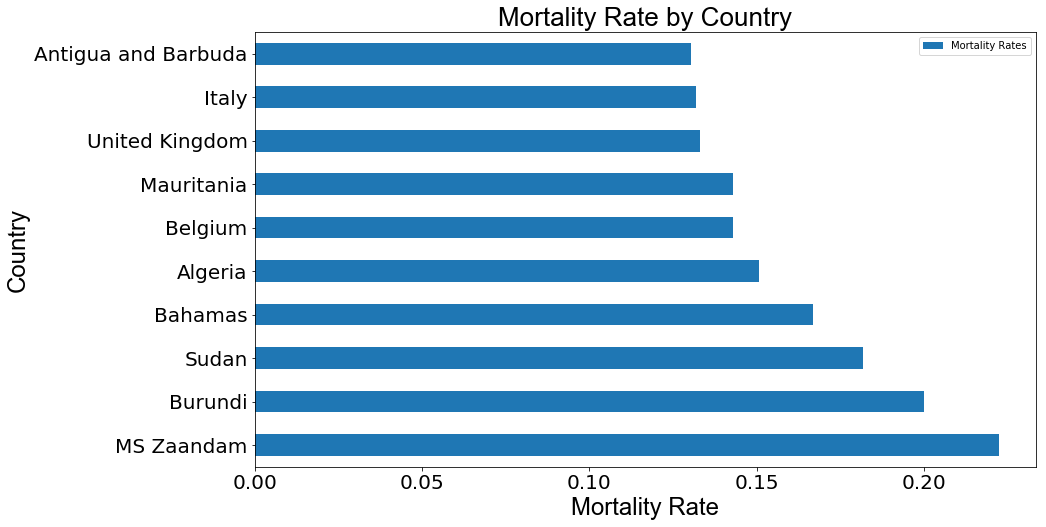

In [43]:
covid_outcomes_mplt = covid_outcomes[['Mortality Rates']].sort_values('Mortality Rates', ascending=False).head(10).plot(kind='barh', figsize=(14, 8))
covid_outcomes_mplt.set_ylabel("Country", fontname="Arial", fontsize=24)
covid_outcomes_mplt.set_xlabel("Mortality Rate", fontname="Arial", fontsize=24)
covid_outcomes_mplt.set_title("Mortality Rate by Country", fontname='Arial', fontsize=26)

for item in (covid_outcomes_mplt.get_xticklabels() + covid_outcomes_mplt.get_yticklabels()):
    item.set_fontsize(20)


### Countries/Region with Lowest Death Rate

In [44]:
covid_outcomes[['Mortality Rates']].sort_values('Mortality Rates', ascending=True).head(10)

,Mortality Rates
Country/Region,
Rwanda,0.0
Seychelles,0.0
Central African Republic,0.0
Chad,0.0
Sao Tome and Principe,0.0
Saint Vincent and the Grenadines,0.0
Saint Lucia,0.0
Dominica,0.0
Saint Kitts and Nevis,0.0


# Which states and/or countries have a higher recovery rate?
# **Why could that be? Are their medical supplies supple, higher quality, etc?**

###  Recovery Rate Calculation

In [45]:
covid_outcomes['Recovery Rates'] = covid_outcomes.Recovered/covid_outcomes.Confirmed
covid_outcomes.head()

,Confirmed,Recovered,Deaths,Mortality Rates,Recovery Rates
Country/Region,,,,,
Afghanistan,906,99,30,0.033113,0.109272
Albania,539,283,26,0.048237,0.525046
Algeria,2418,846,364,0.150538,0.349876
Andorra,696,191,35,0.050287,0.274425
Angola,19,5,2,0.105263,0.263158


## Highest Recovery Rates (Top 10)

In [46]:
covid_outcomes[['Recovery Rates']].sort_values('Recovery Rates', ascending=False).head(10)

,Recovery Rates
Country/Region,
China,0.925883
Diamond Princess,0.904494
Brunei,0.823529
Cambodia,0.803279
Vietnam,0.738806
"Korea, South",0.736154
Saint Lucia,0.733333
Iceland,0.697834
Liechtenstein,0.696203


##  Feature Engineering

### Displaying the First 5 Rows for Confirmed, Recovered, and Deaths 

In [47]:
covid_outcomes[['Confirmed', 'Recovered', 'Deaths', 'Mortality Rates', 'Recovery Rates']]
display(covid_outcomes.head())

,Confirmed,Recovered,Deaths,Mortality Rates,Recovery Rates
Country/Region,,,,,
Afghanistan,906,99,30,0.033113,0.109272
Albania,539,283,26,0.048237,0.525046
Algeria,2418,846,364,0.150538,0.349876
Andorra,696,191,35,0.050287,0.274425
Angola,19,5,2,0.105263,0.263158


## Checking String-encoded Categorical Data for the Global Confirmed Data
#### Using value_counts helps to check the contents of a single column in a DataFrame along with showing us what the unique values are and how often they appear.  

In [48]:
print(covid_outcomes.Confirmed.value_counts())

143      3
16       3
9        3
43       2
35       2
        ..
32813    1
1658     1
3480     1
407      1
4662     1
Name: Confirmed, Length: 166, dtype: int64


## Checking String-encoded Categorical Data for the Global Recovered Data

In [49]:
print(covid_outcomes.Recovered.value_counts())

0      15
2       9
5       6
4       5
11      4
       ..
159     1
164     1
166     1
935     1
108     1
Name: Recovered, Length: 133, dtype: int64


## Checking String-encoded Categorical Data for the Global Deaths Data

In [50]:
print(covid_outcomes.Deaths.value_counts())

0       32
1       13
2        9
3        8
5        8
        ..
49       1
1327     1
46       1
300      1
1769     1
Name: Deaths, Length: 87, dtype: int64


## Displaying the Original Columns of the Data using the get_dummies Function
#### "This is another approach to applying OneHotEncoding"
#### If you notice, the Original Features and the get_dummies Features are identical due to the data not having multiple categories.

In [51]:
print("Original features:\n", list(covid_outcomes.columns), "\n")
covid_outcomes_dummies = pd.get_dummies(covid_outcomes)
print("Features after get_dummies:\n", list(covid_outcomes_dummies.columns))

Original features:
 ['Confirmed', 'Recovered', 'Deaths', 'Mortality Rates', 'Recovery Rates'] 

Features after get_dummies:
 ['Confirmed', 'Recovered', 'Deaths', 'Mortality Rates', 'Recovery Rates']


## Using Numbers to Encode Categoricals

#### Creating a DataFrame with an Integer Feature and a Categorical String Feature

In [52]:
demo_df = pd.DataFrame({'Integer Feature': [2, 1, 0], 'Categorical Feature': ['Confirmed', 'Recovered', 'Deaths']})
display(demo_df)

,Integer Feature,Categorical Feature
0,2,Confirmed
1,1,Recovered
2,0,Deaths


####  Using get_dummies to Encode the String Feature While Leaving the Integer Feature Unchanged

In [53]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_Confirmed,Categorical Feature_Deaths,Categorical Feature_Recovered
0,2,1,0,0
1,1,0,0,1
2,0,0,1,0


## Creating Dummy Variables for the "Integer Feature" Column
#### "FYI:  Both features will be treated as categorical"

In [54]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))         

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_Confirmed,Categorical Feature_Deaths,Categorical Feature_Recovered
0,0,0,1,1,0,0
1,0,1,0,0,0,1
2,1,0,0,0,1,0


## Plot Displaying Recovery Rate by Country

<Figure size 1440x1800 with 0 Axes>

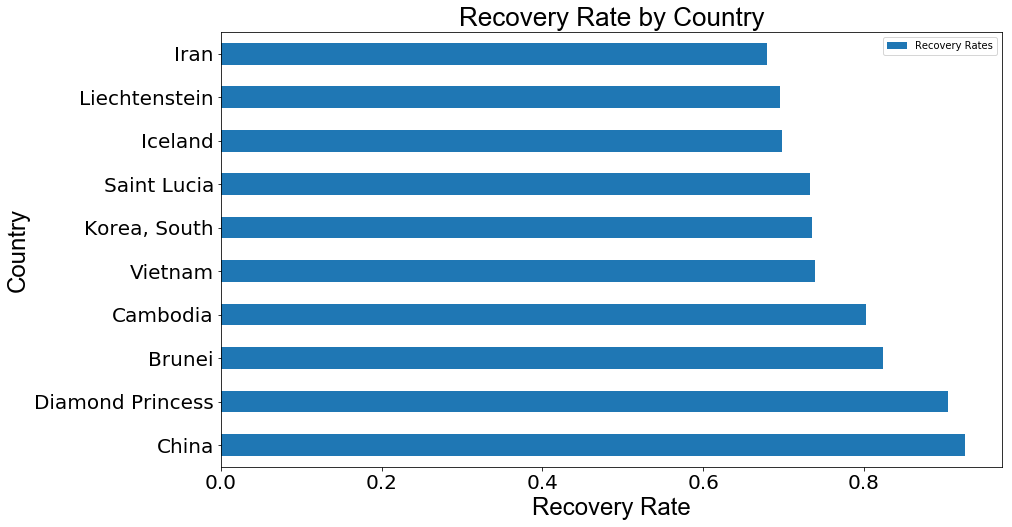

In [55]:
#sns.scatterplot(x = covid_outcomes.index, y = 'Mortality Rates', data = covid_outcomes)\
plt.figure(figsize=(20,25))
#sns.set(font_scale=2)
#sns.plot(covid_outcomes[['Mortality Rates']].sort_values('Mortality Rates', ascending=False).head(10))

covid_outcomes_rplt = covid_outcomes[['Recovery Rates']].sort_values('Recovery Rates', ascending=False).head(10).plot(kind='barh', figsize=(14, 8))
covid_outcomes_rplt.set_ylabel("Country", fontname="Arial", fontsize=24)
covid_outcomes_rplt.set_xlabel("Recovery Rate", fontname="Arial", fontsize=24)
covid_outcomes_rplt.set_title("Recovery Rate by Country", fontname='Arial', fontsize=26)

for item in (covid_outcomes_rplt.get_xticklabels() + covid_outcomes_rplt.get_yticklabels()):
    item.set_fontsize(20)

## Lowest Recovery Rates(Top 10)

In [56]:
covid_outcomes[['Mortality Rates']].sort_values('Mortality Rates', ascending=True).head(10)

,Mortality Rates
Country/Region,
Rwanda,0.0
Seychelles,0.0
Central African Republic,0.0
Chad,0.0
Sao Tome and Principe,0.0
Saint Vincent and the Grenadines,0.0
Saint Lucia,0.0
Dominica,0.0
Saint Kitts and Nevis,0.0


## Sorting Countries/State with Respect to Recovery Rate in Descending order

In [57]:
#Recovered_4=Recovered_3[:]
#Recovered_5=Recovered_4.sort_values(by="Recovery_Rate", ascending=False)
#Recovered_5[['Country/Region', 'Recovery_Rate']]

### Coutries/State with Lowest Recovery_Rate

In [58]:
#Recovered_5[['Country/Region', 'Recovery_Rate']].tail(10)

# What's the probability that a patient who has COVID will be recover vs passing away(death)?

To calculate the probability of deaths we must look at the closed cases (Recovery and Deaths) and then use the formula

- Probabability of Recovery = Recovery/ (Recovery + Death)

- Probabilty of Death = Death / (Recovery + Death)

## Probability of Recovery

In [59]:
covid_outcomes['Closed_Cases'] = covid_outcomes.Recovered + covid_outcomes.Deaths
covid_outcomes.head()

,Confirmed,Recovered,Deaths,Mortality Rates,Recovery Rates,Closed_Cases
Country/Region,,,,,,
Afghanistan,906,99,30,0.033113,0.109272,129
Albania,539,283,26,0.048237,0.525046,309
Algeria,2418,846,364,0.150538,0.349876,1210
Andorra,696,191,35,0.050287,0.274425,226
Angola,19,5,2,0.105263,0.263158,7


## Probability of Death

In [60]:
covid_outcomes['Recovery Probability'] = covid_outcomes.Recovered/(covid_outcomes.Recovered + covid_outcomes.Deaths)
covid_outcomes['Death Probability'] = covid_outcomes.Deaths/(covid_outcomes.Recovered + covid_outcomes.Deaths)
covid_outcomes.head()

,Confirmed,Recovered,Deaths,Mortality Rates,Recovery Rates,Closed_Cases,Recovery Probability,Death Probability
Country/Region,,,,,,,,
Afghanistan,906,99,30,0.033113,0.109272,129,0.767442,0.232558
Albania,539,283,26,0.048237,0.525046,309,0.915858,0.084142
Algeria,2418,846,364,0.150538,0.349876,1210,0.699174,0.300826
Andorra,696,191,35,0.050287,0.274425,226,0.845133,0.154867
Angola,19,5,2,0.105263,0.263158,7,0.714286,0.285714


## Countries with the Highest Probability of Recovery

In [61]:
print('Countries with the Highest Probability of Recovery:\n ')
covid_outcomes.sort_values('Recovery Probability', ascending=False).head(10)

Countries with the Highest Probability of Recovery:
 


,Confirmed,Recovered,Deaths,Mortality Rates,Recovery Rates,Closed_Cases,Recovery Probability,Death Probability
Country/Region,,,,,,,,
Cambodia,122,98,0,0.0,0.803279,98,1.0,0.0
Grenada,14,6,0,0.0,0.428571,6,1.0,0.0
Rwanda,143,65,0,0.0,0.454545,65,1.0,0.0
Central African Republic,12,4,0,0.0,0.333333,4,1.0,0.0
Chad,27,5,0,0.0,0.185185,5,1.0,0.0
Bhutan,5,2,0,0.0,0.400000,2,1.0,0.0
Laos,19,2,0,0.0,0.105263,2,1.0,0.0
Uganda,56,20,0,0.0,0.357143,20,1.0,0.0
Timor-Leste,18,1,0,0.0,0.055556,1,1.0,0.0


## Countries with the Highest Probability of Death

In [62]:
print('Countries with the Highest Probability of Death:\n ')
covid_outcomes.sort_values('Death Probability', ascending=False).head(10)

Countries with the Highest Probability of Death:
 


,Confirmed,Recovered,Deaths,Mortality Rates,Recovery Rates,Closed_Cases,Recovery Probability,Death Probability
Country/Region,,,,,,,,
Haiti,43,0,3,0.069767,0.000000,3,0.000000,1.000000
Botswana,15,0,1,0.066667,0.000000,1,0.000000,1.000000
Belize,18,0,2,0.111111,0.000000,2,0.000000,1.000000
MS Zaandam,9,0,2,0.222222,0.000000,2,0.000000,1.000000
Burundi,5,0,1,0.200000,0.000000,1,0.000000,1.000000
United Kingdom,109769,394,14607,0.133070,0.003589,15001,0.026265,0.973735
Netherlands,30619,315,3471,0.113361,0.010288,3786,0.083201,0.916799
Ireland,13980,77,530,0.037911,0.005508,607,0.126853,0.873147
Norway,6937,32,161,0.023209,0.004613,193,0.165803,0.834197


## Recovery and Death Probability Calculator

The following calculator will return the probability of Recovery or Death based on input or country. 

In [ ]:
Country = str(input('Enter desired Country/Region: '))
Recovery  = covid_outcomes.at[Country, 'Recovered'] / (covid_outcomes.at[Country, 'Recovered'] + covid_outcomes.at[Country, 'Deaths'])
Recovery_rd = Recovery.round(3)
Death  = covid_outcomes.at[Country, 'Deaths'] / (covid_outcomes.at[Country, 'Recovered'] + covid_outcomes.at[Country, 'Deaths'])
Death_rd = Death.round(3)

if Country == Country:
    print('The Recovery Probability for {} is: {}'.format(Country, Recovery_rd))
    print('The Death Probability for {} is: {}'.format(Country, Death_rd))   

else:
    print('You have not typed a valid operator, please run the program again.')



In [ ]:
R = covid_outcomes.Recovered.sum()/(covid_outcomes.Recovered.sum() + covid_outcomes.Deaths.sum())
D = covid_outcomes.Deaths.sum()/(covid_outcomes.Recovered.sum() + covid_outcomes.Deaths.sum())
R2 = R.round(3)
D2 = D.round(3)

print('The overall COVID-19 probability of Recovery is {} and Death is {}'.format(R2, D2))

##### Probability of Recovery is 0.787 which is higher than Probability of Dying from CoronaVirus 0.0.213

# How many total people have died as a result of Covid-19 in the state of New York,Texas, Louisiana, California, and Washington?
Selecting Data of States only from the ( collective By week only)

In [ ]:
Deaths_US=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

Deaths_US['WK 1: 02/01 - 02/07'] = Deaths_US['2/7/20']
Deaths_US['WK 2: 02/08 - 02/14'] = Deaths_US['2/14/20']
Deaths_US['WK 3: 02/15 - 02/21'] = Deaths_US['2/21/20']
Deaths_US['WK 4: 02/22 - 02/28'] = Deaths_US['2/28/20']
Deaths_US['WK 5: 02/29 - 03/06'] = Deaths_US['3/6/20']
Deaths_US['WK 6: 03/07 - 03/13'] = Deaths_US['3/13/20']
Deaths_US['WK 7: 03/14 - 03/20'] = Deaths_US['3/20/20']
Deaths_US['WK 8: 03/21 - 03/27'] = Deaths_US['3/27/20']
Deaths_US['WK 9: 03/28 - 04/03'] = Deaths_US['4/3/20']
Deaths_US['WK 10: 04/04 - 04/10'] = Deaths_US['4/10/20']
Deaths_US['WK 11: 04/11 - 04/17'] = Deaths_US['4/17/20']

#After creating our weeks we will drop the individual day columns

Deaths_US.drop(['1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20'], axis=1, inplace=True)

#Drop rows with null values and keep Province/State column
Deaths_4 = Deaths_US.dropna()
print(Deaths_4.shape)
print(Deaths_4.columns)
Deaths_4.head()

In [ ]:
Deaths_5 = pd.DataFrame((Deaths_4.groupby(['Province_State']).sum()[cols]))
print('Total Deaths for each state including the District of Columbia (51 rows)\n', Deaths_5.shape)
print(Deaths_5.head()

### Selecting Data only for cases (died as a result of Covid-19) for Calculations in next step

In [ ]:
Top_States = Deaths_5.loc[['New York','Texas', 'Louisiana', 'California','Washington'], ['WK 11: 04/11 - 04/17']]
Top_States.rename(columns={'WK 11: 04/11 - 04/17': 'Total Deaths as of 04/17'})

In [ ]:
Top_Statesplt = Top_States.plot(kind='bar', figsize=(10,8))
Top_Statesplt.set_ylabel("Country", fontname="Arial", fontsize=24)
Top_Statesplt.set_xlabel("Mortality Rate", fontname="Arial", fontsize=24)
Top_Statesplt.set_title("Mortality Rate by Country", fontname='Arial', fontsize=26)

for item in (Top_Statesplt.get_xticklabels() + Top_Statesplt.
             get_yticklabels()):
    item.set_fontsize(20)


In [ ]:
Top_States.rename(columns={'WK 11: 04/11 - 04/17': 'Total Deaths in New York, Texas, Louisiana, California, Washington equals'}).sum()

# What are the overall incident rates of COVID-19 in the US population?

By calculating the Rate of Infection we are able to get a full view of the effects COVID 19 is having on a national level.

We will use the formula 

Incident Rate = (New Cases over time/ population at risk over time) x 10^n

In [ ]:
Confirmed_US = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

Confirmed_US.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 
       'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20',
       '4/15/20', '4/16/20', '4/18/20'], axis = 1, inplace=True)

                              
Incident_Rate1 = pd.DataFrame((Confirmed_US.groupby(['Province_State']).sum()))
Incident_Rate1.head()

In [ ]:
Pop = pd.DataFrame((Deaths_4.groupby(['Province_State']). sum()))
Pop.drop(['UID', 'code3', 'FIPS', 'Lat', 'Long_',
       'WK 1: 02/01 - 02/07', 'WK 2: 02/08 - 02/14', 'WK 3: 02/15 - 02/21',
       'WK 4: 02/22 - 02/28', 'WK 5: 02/29 - 03/06', 'WK 6: 03/07 - 03/13',
       'WK 7: 03/14 - 03/20', 'WK 8: 03/21 - 03/27', 'WK 9: 03/28 - 04/03',
       'WK 10: 04/04 - 04/10', 'WK 11: 04/11 - 04/17'],
      axis = 1, inplace=True)

#Adding Population to data from the death dataset. 

Incident_Rate2 = pd.DataFrame(pd.concat([Incident_Rate1, Pop], axis=1, join='inner'))

Incident_Data = pd.DataFrame(Incident_Rate2.rename(columns={'4/17/20' : 'Confirmed'}))

Incident_Data.head()

## US Incident Rate

In [ ]:
US_inc_rate = ((Incident_Data['Confirmed'].sum() / Incident_Data['Population'].sum()) * 10000).round()

print('The US Incedent rate for the 76 day time period is {}.'.format(US_inc_rate))
print( 'For every 10,000 people approxamately {} will catch the Coronavirus.'.format(US_inc_rate))


## US Incident Rate (Statewide)

In [ ]:
Incident_Data['Incident Rate'] = ((Incident_Data['Confirmed'] / Incident_Data['Population']) * 10000).round().astype('int64')
Incident_Data.head()

## Top 10 States with the HIGHEST incident rates

In [ ]:
Incident_Data.sort_values('Incident Rate', ascending=False).head(10)

## Top 10 States with the LOWEST incident rates

In [ ]:
Incident_Data.sort_values('Incident Rate', ascending=True).head(10)